# Pymaceuticals Inc.
---

### Analysis

- There is an obvious positive correlation between tumor volume and mouse weight.
- Of the four treatment regimens displayed in the graphs below, only Infubinol contained an outlier in the tumor volume vs mouse weight data.
- Capomulin and Ramicane have the lowest mean and median tumor volumes, suggesting that these two drugs might be more effective at reducing tumor size compared to the others.
- Conversely, Ketapril has the highest mean tumor volume at 55.236, suggesting it may be less effective than other drugs based on the larger average tumor volume. This drug also has the highest variance and standard deviation in tumor volumes, which reflects more inconsistency in tumor responses to this drug.
- Ketapril, Naftisol, and Stelasyn all performed worse than the Placebo and therefore appear to be the least effective treatment options.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df=pd.merge(mouse_metadata,study_results, how="left", on="Mouse ID")

# Display the data table for preview
combined_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Checking the number of mice.
mice_count = combined_df['Mouse ID'].nunique()
print(f'Total Number of Mice: {mice_count}')

Total Number of Mice: 249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_ID=combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique() 
duplicate_ID
#The duplicated() function checks for duplicate rows in the DataFrame.
#The subset parameter specifies the columns to consider when identifying duplicates. In this case, it looks for duplicates based on the combination of 'Mouse ID' and 'Timepoint'.
#The second Mouse ID specifies that you want to select the 'Mouse ID' column from the filtered DataFrame of duplicates.
#.unique effectively gives you an array of unique Mouse IDs that have duplicates based on the specified criteria.


array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_df.loc[combined_df['Mouse ID'] =="g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#code basically says "if anything present in the combined_df is also present in the duplicate_ID variable, get rid of it.
clean_combined_df= combined_df[~combined_df['Mouse ID'].isin(duplicate_ID)]
clean_combined_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_combined_df['Mouse ID'].nunique()
clean_mice_count

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Generate summary statistics
mean = clean_combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
median = clean_combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
variance = clean_combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
sd =clean_combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
sem = clean_combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()
summary_table = pd.DataFrame({"Mean Tumor Volume":mean,
                              "Median Tumor Volume":median,
                              "Tumor Volume Variance":variance,
                              "Tumor Volume Std. Dev":sd,
                              "Tumor Volume Std. Err":sem})
summary_table = summary_table.round(3)
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Group the DataFrame by 'Drug Regimen' and calculate summary statistics for 'Tumor Volume (mm3)'
summary_stats = clean_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',                    # Calculate the mean of tumor volume
    median='median',                # Calculate the median of tumor volume
    variance='var',                 # Calculate the variance of tumor volume
    standard_deviation='std',       # Calculate the standard deviation of tumor volume
    SEM=st.sem                      # Calculate the Standard Error of the Mean using scipy's sem function
).reset_index()                     # Reset the index to convert the grouped column back into a regular column

# Set the 'Drug Regimen' as the index of the summary DataFrame
summary_stats.set_index('Drug Regimen', inplace=True)

# Round the summary statistics to 2 decimal places
summary_stats = summary_stats.round(3)

# Print the resulting summary statistics DataFrame
print(summary_stats)

                mean  median  variance  standard_deviation    SEM
Drug Regimen                                                     
Capomulin     40.676  41.558    24.948               4.995  0.329
Ceftamin      52.591  51.776    39.290               6.268  0.470
Infubinol     52.885  51.821    43.129               6.567  0.492
Ketapril      55.236  53.699    68.554               8.280  0.604
Naftisol      54.332  52.509    66.173               8.135  0.596
Placebo       54.034  52.289    61.168               7.821  0.581
Propriva      52.321  50.446    43.852               6.622  0.544
Ramicane      40.217  40.673    23.487               4.846  0.321
Stelasyn      54.233  52.432    59.451               7.710  0.573
Zoniferol     53.237  51.818    48.533               6.967  0.516


## Bar and Pie Charts

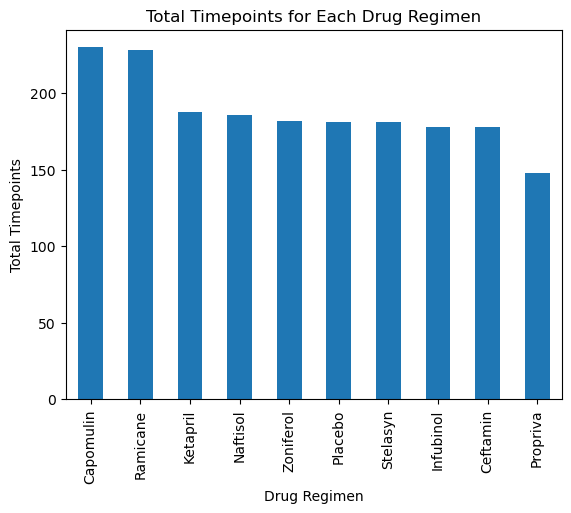

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_drug_counts = clean_combined_df['Drug Regimen'].value_counts()

# Create a bar plot
total_drug_counts.plot(kind='bar')

# Set the title and labels
plt.title('Total Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')

# Show the plot
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

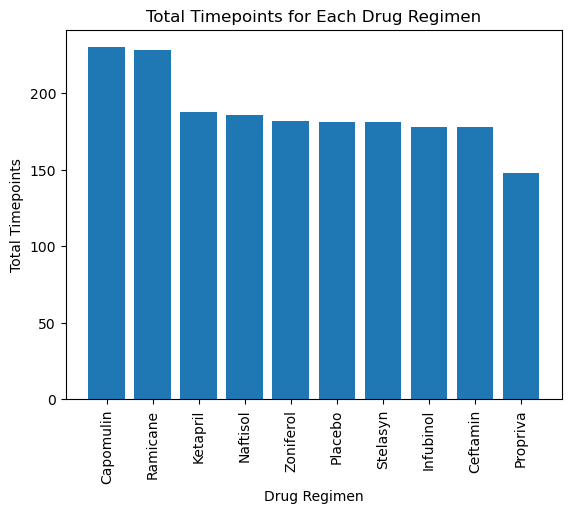

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_drug_counts = clean_combined_df['Drug Regimen'].value_counts()
plt.bar(total_drug_counts.index.values, total_drug_counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Total Timepoints")
plt.title("Total Timepoints for Each Drug Regimen")
plt.show()

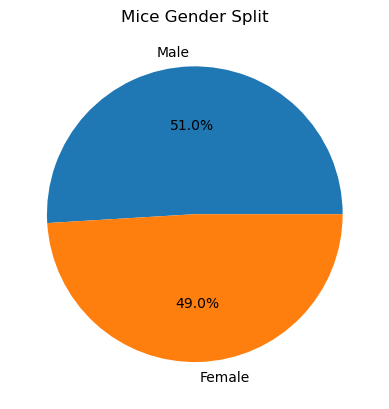

In [16]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
female_vs_male = clean_combined_df['Sex'].value_counts()

# Create the pie chart
female_vs_male.plot(kind="pie", autopct='%1.1f%%', title="Mice Gender Split", ylabel='')

# Display the pie chart
plt.show()


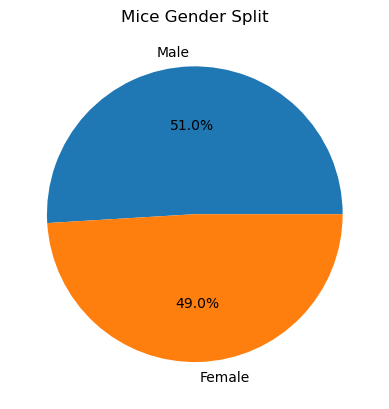

In [17]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
female_vs_male = clean_combined_df['Sex'].value_counts()

# Create the pie chart
plt.pie(female_vs_male, labels=female_vs_male.index, autopct='%1.1f%%')

# Set the title and remove the y-label for clarity
plt.title("Mice Gender Split")
plt.ylabel("") 
plt.show()

## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor_timepoint=clean_combined_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor_timepoint=max_tumor_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data=max_tumor_timepoint.merge(clean_combined_df,on=['Mouse ID','Timepoint'],how='left')
merged_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [68]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']

    # add subset
    tumor_volume.append(final_tumor_volume)

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([.25,.5,.75]) #calculating quartiles
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    IQR = upperq-lowerq #finding inter quartile range
    Low_bound = lowerq - (1.5*IQR)
    Upper_bound = upperq + (1.5*IQR)
    outliers = final_tumor_volume.loc[(final_tumor_volume < Low_bound) | (final_tumor_volume > Upper_bound)] #finding values below lower bound and above upper
    print(f"{drug}'s potential outliers are: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


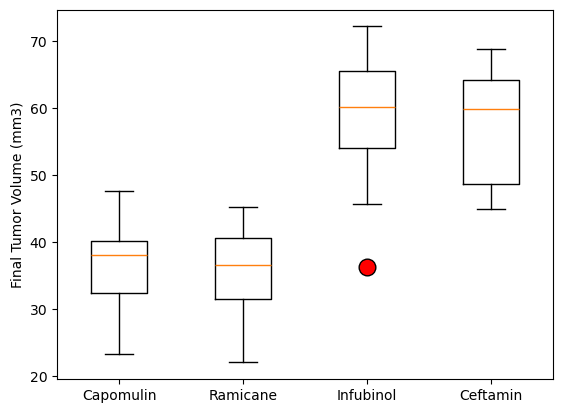

In [74]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
Volume_distribution = dict(markerfacecolor='red', markersize=12)
plt.boxplot(tumor_volume, labels = treatment_list, flierprops = Volume_distribution)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [90]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_data = clean_combined_df.loc[clean_combined_df['Drug Regimen'] == "Capomulin"]
Capomulin_data.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(0.5, 1.0, 'Capomulin Treatment on Mouse l509')

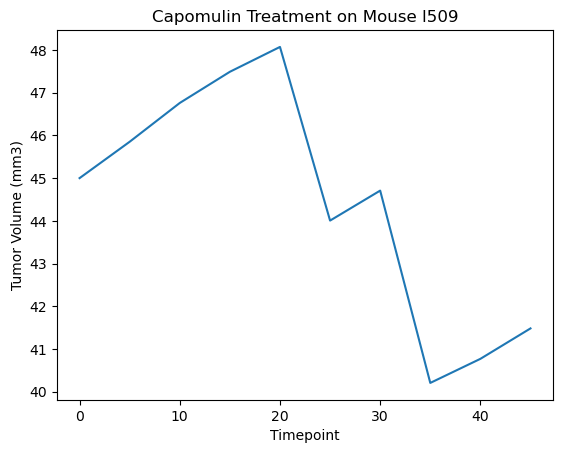

In [92]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data = Capomulin_data.loc[Capomulin_data['Mouse ID'] == 'l509']
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment on Mouse l509')


In [130]:
Capomulin_data = clean_combined_df.loc[clean_combined_df['Drug Regimen'] == "Capomulin"]
Capomulin_average = Capomulin_data.groupby(['Mouse ID'])[['Tumor Volume (mm3)', 'Weight (g)']].mean().reset_index()
Capomulin_average.head()

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22.0
1,b742,40.083699,21.0
2,f966,36.505973,17.0
3,g288,41.990097,19.0
4,g316,44.613344,22.0


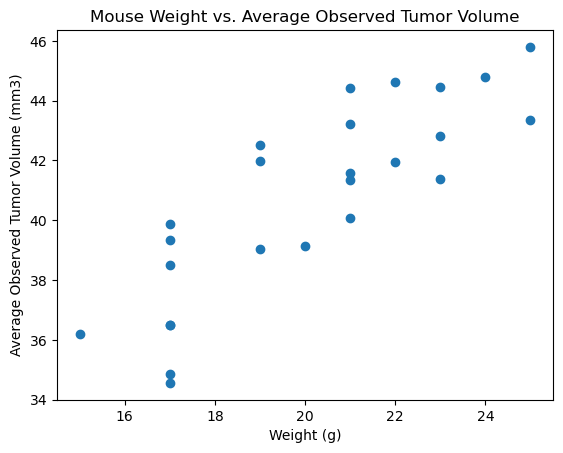

In [134]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(Capomulin_average["Weight (g)"],Capomulin_average["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Average Observed Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Observed Tumor Volume')
plt.show()

## Correlation and Regression

Correlation coefficient: 0.84


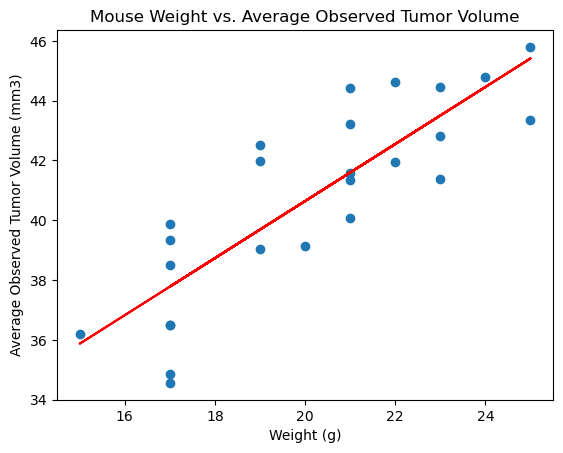

In [144]:
# Calculate the correlation coefficient and a linear regression model
Corr_co, _ = st.pearsonr(Capomulin_average['Weight (g)'], Capomulin_average['Tumor Volume (mm3)'])
#This line calculates the Pearson correlation coefficient between mouse weight and average observed tumor volume for the Capomulin regimen. 
#The st.pearsonr function returns two values: the correlation coefficient (stored in Corr_co) and the p-value (which is ignored here with _).
print(f'Correlation coefficient: {round(Corr_co, 2)}')

model = st.linregress(Capomulin_average['Weight (g)'], Capomulin_average['Tumor Volume (mm3)'])
#This line performs linear regression on the average tumor volume as a function of mouse weight. The st.linregress function returns several values, 
#including the slope and intercept of the regression line, which are stored in the model variable.

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = Capomulin_average['Weight (g)']
#This line extracts the mouse weight values from the Capomulin_average DataFrame and stores them in the x_values variable. 
#These values will be used as the x-coordinates for the scatter plot and the linear regression line.

y_values = Capomulin_average ['Weight (g)']*model[0]+model[1]
#This line calculates the corresponding y-values for the linear regression line using the formula ( y = mx + b ), 
#where ( m ) is the slope (model[0]) and ( b ) is the intercept (model[1]). However, it looks like you should actually use model.slope and model.intercept for clarity.

plt.scatter(Capomulin_average["Weight (g)"],Capomulin_average["Tumor Volume (mm3)"])
#This line creates a scatter plot of mouse weight (x-axis) versus average observed tumor volume (y-axis) using the plt.scatter function. 

plt.plot(x_values, y_values, color='red', label = 'Linear Regression Line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Observed Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Observed Tumor Volume')
plt.show()